<a href="https://colab.research.google.com/github/Mai-Binh-Nam/Hand-on_DataAnalysisVEF/blob/master/Lecture_8_Hands_on_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
# Option to specify the default size of plots by seaborn. A4 size
sns.set(rc={'figure.figsize':(11.7,8.27)})

# k-means with generated dataset

## Purposely generate data around 3 centroids

In [ ]:
# Set three centers
center_1 = np.array([1,1])
center_2 = np.array([5,4])
center_3 = np.array([9,1])


# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)


# data = pd.DataFrame(data)
# data.columns = ["feature_1","feature_2"]

# means = [[2, 2], [8, 3], [3, 6]]
# cov = [[1, 0], [0, 1]]
# N = 500
# data_1 = np.random.multivariate_normal(means[0], cov, N)
# data_2 = np.random.multivariate_normal(means[1], cov, N)
# data_3 = np.random.multivariate_normal(means[2], cov, N)

# data = np.concatenate((data_1, data_2, data_3), axis = 0)

In [ ]:
data

array([[ 7.25373473e-01,  8.11275783e-01],
       [ 1.55208347e+00,  6.09409094e-01],
       [ 1.03837773e+00,  1.04725241e-01],
       ...,
       [ 1.03038833e+01, -7.71602694e-03],
       [ 8.33517601e+00,  1.68770697e+00],
       [ 9.83620009e+00,  7.02828377e-01]])

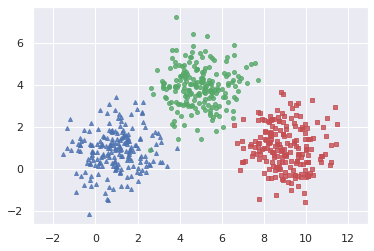

In [ ]:
plt.plot(data_1[:, 0], data_1[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(data_2[:, 0], data_2[:, 1], 'go', markersize = 4, alpha = .8)
plt.plot(data_3[:, 0], data_3[:, 1], 'rs', markersize = 4, alpha = .8)

plt.axis('equal')
plt.plot()
plt.show()

## One iteration of assigning centroids and calculating distances

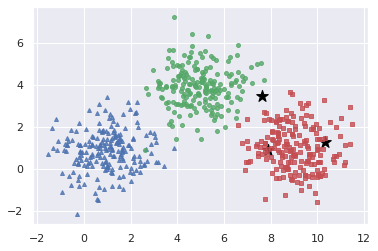

In [ ]:
# Number of clusters - supposing started with 3 clusters
k = 3

# Number of training data, or the number of rows
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# Pick K random centers
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
center_points = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
# plt.scatter(data[:,0], data[:,1], s=7)

plt.plot(data_1[:, 0], data_1[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(data_2[:, 0], data_2[:, 1], 'go', markersize = 4, alpha = .8)
plt.plot(data_3[:, 0], data_3[:, 1], 'rs', markersize = 4, alpha = .8)

plt.scatter(center_points[:,0], center_points[:,1], marker='*', c='black', s=150)

In [ ]:
center_points

array([[ 7.88710351,  0.90979902],
       [10.31338579,  1.26686181],
       [ 7.64654251,  3.45537102]])

Step 2 - Assign each $x_i$ data point to nearest cluster - calculating its distance to each centroid

In [ ]:
# center_points = np.random.randn(k,c)*std + mean

# Store old centers - to store value of centroids when it updates
centers_old = np.zeros(center_points.shape)

# Store new centers
centers_new = center_points.copy()

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

In [ ]:
# Using Euclidean Distance between new and old centroids
error = np.linalg.norm(centers_new - centers_old)

print("Old centers: \n", centers_old)

# Step 4: Repeat Step 2 and 3 until error is zero
while error != 0:
    # Step 2: Measure the distance between data points to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - center_points[i], axis=1)
        
    # Assign each training data to its closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = centers_new.copy()
    
    # Step 3: Finding new centers by calculating mean for every cluster
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)

print("New centers: \n", centers_new)

Old centers: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
New centers: 
 [[3.78667522 0.64054749]
 [9.98304103 0.85583411]
 [4.5725581  3.55857725]]


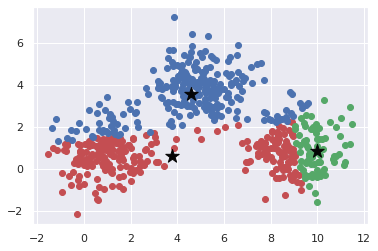

In [ ]:
# Plot the new centers
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'violet','navy','aqua','pink']

fig, ax = plt.subplots()

for i in range(k):
  points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(centers_new[:, 0], centers_new[:, 1], marker='*', s=200, c='#050505')


# plt.plot(data[clusters == 0][:, 0], data[clusters == 0][:, 1], 'b^', markersize = 4, alpha = .8)
# plt.plot(data[clusters == 1][:, 0], data[clusters == 1][:, 1], 'go', markersize = 4, alpha = .8)
# plt.plot(data[clusters == 2][:, 0], data[clusters == 2][:, 1], 'rs', markersize = 4, alpha = .8)

# plt.scatter(centers_new[:,0], center_points[:,1], marker='*', c='black', s=250)

## Elbow Method to choose number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

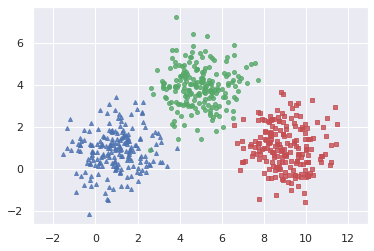

In [ ]:
plt.plot(data_1[:, 0], data_1[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(data_2[:, 0], data_2[:, 1], 'go', markersize = 4, alpha = .8)
plt.plot(data_3[:, 0], data_3[:, 1], 'rs', markersize = 4, alpha = .8)

plt.axis('equal')
plt.plot()
plt.show()

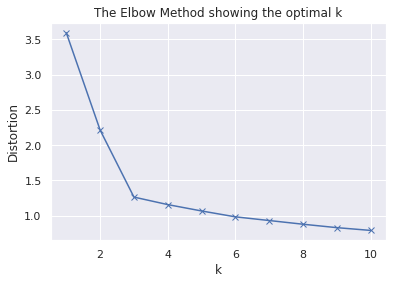

In [ ]:
# k-means --> determine optimal k using elbow method
distortions = []
K = range(1,11)


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Using k-means for RFM model

## Retail dataset: Read and Clean

In [ ]:
## Read-in the dataset

retail = pd.read_excel("https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true")
# retail.to_csv("sample_retail_data.csv")

In [ ]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Transform Invoice date to date format

retail["InvoiceDate"] = retail["InvoiceDate"].astype("datetime64[D]")

In [ ]:
retail["InvoiceDate"].agg(["min","max"])

## The max date is '2010-12-09', we will assume that we are at that date while doing this analysis.

min   2009-12-01
max   2010-12-09
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
# See the overview for numerical data
retail.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [ ]:
# We see there are invoices with negative quantity, are they returned orders? --> No

pd.merge(retail[retail["Quantity"] >= 0],
         retail[retail["Quantity"] < 0],
         on="Invoice",
         how="inner")

,Invoice,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,Price_x,Customer ID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,Price_y,Customer ID_y,Country_y


In [ ]:
# Do the same for price

pd.merge(retail[retail["Price"] >= 0],
         retail[retail["Price"] < 0],
         on="Invoice",
         how="inner")

,Invoice,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,Price_x,Customer ID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,Price_y,Customer ID_y,Country_y


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


We see many missing values for the `Customer ID` columns and some null item description. Here, we will need to clean the missing `Customer ID` only as the missing item description is not a big issue for the final dataset.

**Question: Can we use imputation to fill the missing customer ID?**

In [ ]:
# backup = retail.copy()
retail = backup.copy()

In [ ]:
retail = retail[(pd.isnull(retail["Customer ID"])==False) & (retail["Quantity"]>=0) & (retail["Price"]>=0)]


In [ ]:
retail.describe()

,Quantity,Price,Customer ID
count,407695.000000,407695.000000,407695.000000
mean,13.586686,3.294188,15368.504107
std,96.842229,34.756655,1679.795700
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


### Summarize data to have RFM features

In [ ]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


In [ ]:
# Calculate the sub-total for each Stock in each order 

retail["StockValue"] = retail["Quantity"] * retail["Price"]

In [ ]:
retail.groupby("Customer ID").agg({"Invoice":"nunique",
                                   "InvoiceDate":["min","max"],
                                   "StockValue":"sum"}).reset_index()

Customer ID Invoice InvoiceDate            StockValue
                 nunique         min        max        sum
0        12346.0      11  2009-12-14 2010-06-28     372.86
1        12347.0       2  2010-10-31 2010-12-07    1323.32
2        12348.0       1  2010-09-27 2010-09-27     222.16
3        12349.0       3  2010-04-29 2010-10-28    2671.14
4        12351.0       1  2010-11-29 2010-11-29     300.93
...          ...     ...         ...        ...        ...
4309     18283.0       6  2010-02-19 2010-11-22     641.77
4310     18284.0       1  2010-10-04 2010-10-04     461.68
4311     18285.0       1  2010-02-17 2010-02-17     427.00
4312     18286.0       2  2009-12-16 2010-08-20    1296.43
4313     18287.0       4  2010-05-17 2010-11-22    2345.71

[4314 rows x 5 columns]

In [ ]:
## Calculate the number of distinct order, the number of days since last purchase, the total monetary value

rfm = retail.groupby("Customer ID").agg({"Invoice":"nunique",
                                   "InvoiceDate":["min","max"],
                                   "StockValue":"sum"}).reset_index()

In [ ]:
rfm.columns = ["customer_id","frequency","first_order_date","last_order_date","monetary"]

In [ ]:
rfm.head()

,customer_id,frequency,first_order_date,last_order_date,monetary
0,12346.0,11,2009-12-14,2010-06-28,372.86
1,12347.0,2,2010-10-31,2010-12-07,1323.32
2,12348.0,1,2010-09-27,2010-09-27,222.16
3,12349.0,3,2010-04-29,2010-10-28,2671.14
4,12351.0,1,2010-11-29,2010-11-29,300.93


In [ ]:
## Compute the recency
from datetime import datetime

# datetime(2010,12,9) 

rfm["recency"] = [(datetime(2010,12,9) - x).days for x in rfm["last_order_date"]]

In [ ]:
rfm.dtypes

customer_id                float64
frequency                    int64
first_order_date    datetime64[ns]
last_order_date     datetime64[ns]
monetary                   float64
recency                      int64
dtype: object

In [ ]:
rfm.describe()

,customer_id,frequency,monetary,recency
count,4314.000000,4314.000000,4314.000000,4314.000000
mean,15348.880389,4.454103,2047.288659,90.269819
std,1700.930104,8.168658,8912.523243,96.944304
min,12346.000000,1.000000,0.000000,0.000000
25%,13883.250000,1.000000,307.950000,17.000000
50%,15348.500000,2.000000,705.550000,52.000000
75%,16833.750000,5.000000,1722.802500,135.000000
max,18287.000000,205.000000,349164.350000,373.000000


### Remove outliers

In [ ]:
rfm[["frequency","recency","monetary"]].quantile([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

,frequency,recency,monetary
0.01,1.0,0.0,39.9565
0.05,1.0,2.0,110.4365
0.10,1.0,7.0,155.4850
0.25,1.0,17.0,307.9500
0.50,2.0,52.0,705.5500
0.75,5.0,135.0,1722.8025
0.90,9.0,254.0,3796.5950
0.95,13.0,303.0,6235.1205
0.99,31.0,367.0,20136.7825


In [ ]:
quantiles = rfm[["frequency","recency","monetary"]].quantile([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

In [ ]:
rfm = rfm[(rfm["monetary"] < quantiles.loc[0.95, "monetary"]) & (rfm["recency"] < quantiles.loc[0.95, "recency"]) & (rfm["frequency"] < quantiles.loc[0.99, "frequency"])]

## Get familiar with k-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
X = rfm[["recency","frequency","monetary"]]

In [ ]:
X.describe()

,recency,frequency,monetary
count,3471.000000,3471.000000,3471.000000
mean,71.171997,3.196773,990.700993
std,67.474282,2.546660,880.693616
min,0.000000,1.000000,3.750000
25%,18.000000,1.000000,317.095000
50%,49.000000,2.000000,673.600000
75%,102.000000,4.000000,1406.720000
max,255.000000,16.000000,3943.600000


In [ ]:
X.head()

,recency,frequency,monetary
0,164,11,372.86
1,2,2,1323.32
2,73,1,222.16
3,42,3,2671.14
4,10,1,300.93


In [ ]:
# Use scikit-learn to fit a k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

kmeans.cluster_centers_

array([[3.37580175e+01, 9.54810496e+00, 4.23065433e+03],
       [9.64486381e+01, 2.03501946e+00, 4.75025316e+02],
       [5.09070248e+01, 5.50826446e+00, 1.88822011e+03]])

In [ ]:
kmeans.labels_

array([1, 2, 1, ..., 1, 2, 2], dtype=int32)

In [ ]:
X_w_labels = pd.concat([X, pd.Series(kmeans.labels_)], axis = 1)
X_w_labels.columns = ["recency","frequency","monetary","cluster"]
X_w_labels.head()

,recency,frequency,monetary,cluster
0,164.0,11.0,372.86,1.0
1,2.0,2.0,1323.32,2.0
2,73.0,1.0,222.16,1.0
3,42.0,3.0,2671.14,2.0
4,10.0,1.0,300.93,1.0


In [ ]:
X_w_labels.groupby("cluster").agg({"cluster":"count",
                                  "recency":"mean",
                                   "frequency":"mean",
                                   "monetary":"mean"})

,cluster,recency,frequency,monetary
cluster,,,,
0.0,343,76.452145,3.689769,1311.090693
1.0,2570,78.803356,3.546472,1167.396070
2.0,968,81.135731,3.482599,1172.538729


In [ ]:
X_w_labels.groupby("cluster").agg({"cluster":"count",
                                  "recency":["min",np.median,"mean","max"],
                                   "frequency":["min",np.median,"mean","max"],
                                   "monetary":["min",np.median,"mean","max"]})

cluster recency         ... monetary                      
          count     min median  ...   median         mean      max
cluster                         ...                               
0.0         343     0.0   50.0  ...  800.670  1311.090693  6191.32
1.0        2570     0.0   50.0  ...  717.070  1167.396070  6226.43
2.0         968     0.0   52.0  ...  692.625  1172.538729  6174.47

[3 rows x 13 columns]

### Plotting

In [ ]:
cluster_centers = kmeans.cluster_centers_

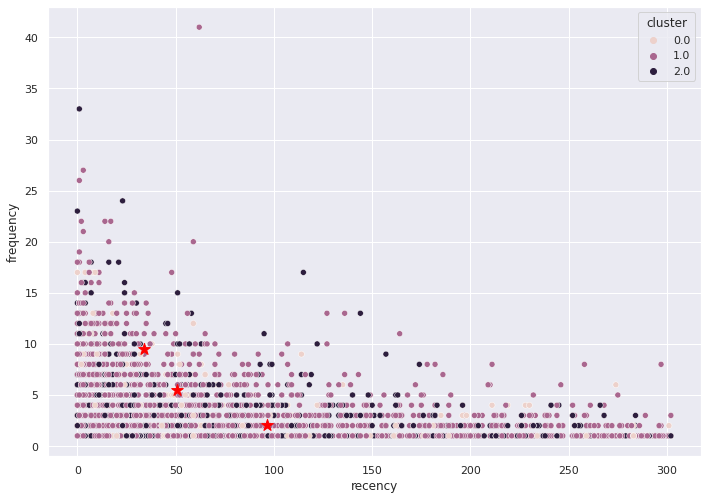

In [ ]:
sns.scatterplot(x="recency", y="frequency", data=X_w_labels, hue="cluster")

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', c='red', s=150)

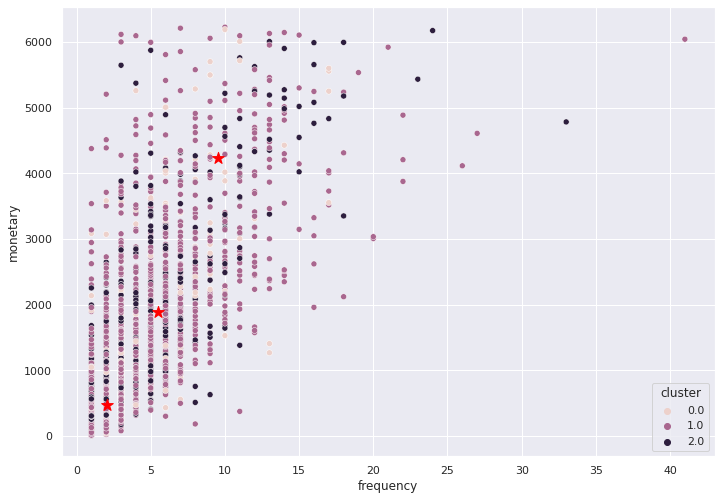

In [ ]:
sns.scatterplot(x="frequency", y="monetary", data=X_w_labels, hue="cluster")

plt.scatter(cluster_centers[:,1], cluster_centers[:,2], marker='*', c='red', s=150)

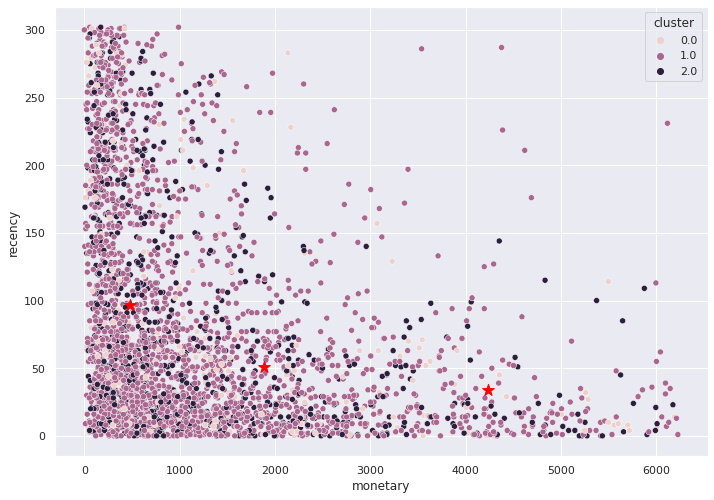

In [ ]:
sns.scatterplot(x="monetary", y="recency", data=X_w_labels, hue="cluster")

plt.scatter(cluster_centers[:,2], cluster_centers[:,0], marker='*', c='red', s=150)

### Rescale dataset

In [ ]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ["recency","frequency","monetary"]

In [ ]:
X_scaled.head()

,recency,frequency,monetary
0,1.056111,2.124252,-0.649278
1,-0.969799,-0.447246,0.135289
2,-0.081900,-0.732968,-0.773675
3,-0.469574,-0.161524,1.247861
4,-0.869754,-0.732968,-0.708653


## Choosing the number of clusters

### Using elbow method

In [ ]:
X_scaled = X

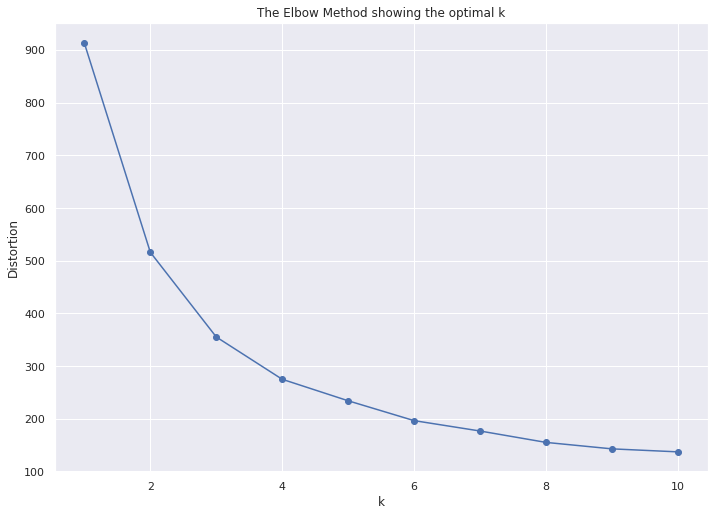

In [ ]:
# k-means --> determine optimal k using elbow method
distortions = []
K = range(1,11)


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Using silhouette method

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k = 3

kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
# kmeanModel.fit(X_scaled)

cluster_labels = kmeanModel.fit_predict(X_scaled)

silhouette_score(X_scaled, cluster_labels)

0.6422049877313734

Number of clusters: 2, Silhouette score: 0.7053116329286306
Number of clusters: 3, Silhouette score: 0.6422049877313734
Number of clusters: 4, Silhouette score: 0.5973954046373525
Number of clusters: 5, Silhouette score: 0.5811238106769315
Number of clusters: 6, Silhouette score: 0.5319152012344601
Number of clusters: 7, Silhouette score: 0.531040101217579
Number of clusters: 8, Silhouette score: 0.4894079137513895
Number of clusters: 9, Silhouette score: 0.47746380997995597
Number of clusters: 10, Silhouette score: 0.4780162940584947


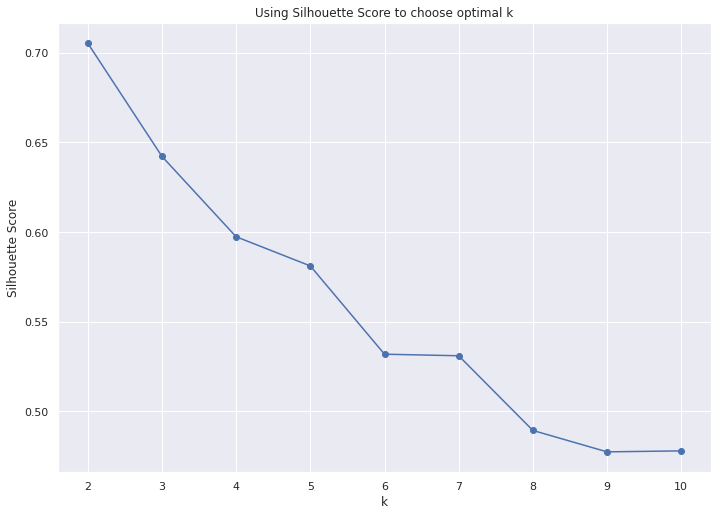

In [ ]:
silhouettes = []
K = range(2,11)


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    # kmeanModel.fit(X_scaled)
    cluster_labels = kmeanModel.fit_predict(X_scaled)
    avg_silhouette = silhouette_score(X_scaled, cluster_labels)
    silhouettes.append(avg_silhouette)
    print("Number of clusters: {}, Silhouette score: {}".format(k, avg_silhouette))


# Plot the elbow
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Using Silhouette Score to choose optimal k')
plt.show()

## Cluster EDA

In [ ]:
X = rfm[["recency","frequency","monetary"]]

In [ ]:
X.agg(["mean","std"], axis=0)

,recency,frequency,monetary
mean,79.549085,3.565318,1159.424519
std,79.974372,3.500357,1211.601120


In [ ]:
from sklearn import preprocessing

# X_scaled = preprocessing.StandardScaler().fit(X)
# print("Transform means: ", X_scaled.mean_)
# print("Transform standard deviations: ", X_scaled.scale_)

X_scaled = preprocessing.scale(X)

In [ ]:
rfm.head()

,customer_id,frequency,first_order_date,last_order_date,monetary,recency
0,12346.0,11,2009-12-14,2010-06-28,372.86,164
1,12347.0,2,2010-10-31,2010-12-07,1323.32,2
2,12348.0,1,2010-09-27,2010-09-27,222.16,73
3,12349.0,3,2010-04-29,2010-10-28,2671.14,42
4,12351.0,1,2010-11-29,2010-11-29,300.93,10


In [ ]:
X_scaled.head()

,recency,frequency,monetary
0,164,11,372.86
1,2,2,1323.32
2,73,1,222.16
3,42,3,2671.14
4,10,1,300.93


In [ ]:
# Set the number of clusters
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)


print("Cluster centers (scaled data): \n ", kmeans.cluster_centers_)

Cluster centers (scaled data): 
  [[6.87433628e+01 2.85176991e+00 7.69026539e+02]
 [4.14285714e+01 6.19312169e+00 2.26569387e+03]
 [9.20078403e+01 1.50106914e+00 2.72802488e+02]
 [4.03009709e+01 7.20388350e+00 3.27559379e+03]
 [5.49051724e+01 4.46034483e+00 1.43030459e+03]]


In [ ]:
X_w_labels = pd.concat([rfm, pd.Series(kmeans.labels_)], axis = 1)

In [ ]:
X_w_labels.head()

,customer_id,frequency,first_order_date,last_order_date,monetary,recency,0
0,12346.0,11.0,2009-12-14,2010-06-28,372.86,164.0,2.0
1,12347.0,2.0,2010-10-31,2010-12-07,1323.32,2.0,4.0
2,12348.0,1.0,2010-09-27,2010-09-27,222.16,73.0,2.0
3,12349.0,3.0,2010-04-29,2010-10-28,2671.14,42.0,1.0
4,12351.0,1.0,2010-11-29,2010-11-29,300.93,10.0,2.0


In [ ]:
X_w_labels.columns = ["customer_id","frequency","first_order_date","last_order_date","monetary","recency","cluster"]

X_w_labels.head()

,customer_id,frequency,first_order_date,last_order_date,monetary,recency,cluster
0,12346.0,11.0,2009-12-14,2010-06-28,372.86,164.0,2.0
1,12347.0,2.0,2010-10-31,2010-12-07,1323.32,2.0,4.0
2,12348.0,1.0,2010-09-27,2010-09-27,222.16,73.0,2.0
3,12349.0,3.0,2010-04-29,2010-10-28,2671.14,42.0,1.0
4,12351.0,1.0,2010-11-29,2010-11-29,300.93,10.0,2.0


In [ ]:
X_w_labels.groupby("cluster").agg({"customer_id":"nunique",
                                  "recency":"mean",
                                   "frequency":"mean",
                                   "monetary":"mean"}).reset_index()

,cluster,customer_id,recency,frequency,monetary
0,0.0,725,72.997241,3.228966,1015.377286
1,1.0,296,70.277027,3.212838,1029.050709
2,2.0,1134,71.918871,3.150794,987.178166
3,3.0,162,59.277778,3.246914,1141.163895
4,4.0,469,72.230277,3.189765,1045.438787


In [ ]:
X_w_labels.groupby("cluster").agg({"customer_id":"count",
                                  "recency":["min",np.median,"mean","max"],
                                   "frequency":["min",np.median,"mean","max"],
                                   "monetary":["min",np.median,"mean","max"]}).reset_index()

cluster customer_id recency         ... monetary                              
                count     min median  ...      min  median         mean      max
0     0.0         725     0.0   52.0  ...     3.75  695.54  1015.377286  3881.89
1     1.0         296     0.0   54.0  ...    30.15  746.40  1029.050709  3813.08
2     2.0        1134     0.0   50.0  ...     7.49  679.42   987.178166  3934.25
3     3.0         162     0.0   42.0  ...    81.36  724.22  1141.163895  3876.47
4     4.0         469     0.0   48.0  ...    24.35  797.96  1045.438787  3908.44

[5 rows x 14 columns]

# Contribution of each cluster

In [ ]:
clusters = X_w_labels.groupby("cluster").agg({"customer_id":"count",
                                              "frequency":"sum",
                                              "monetary":"sum"}).reset_index()

clusters.columns = ["cluster", "customer_count", "total_orders","total_monetary"]

In [ ]:
clusters.head()

,cluster,customer_count,total_orders,total_monetary,order_per_customer,order_value_per_customer
0,0.0,446,1622.0,537314.143,3.636771,1204.740231
1,1.0,1866,6658.0,2208921.256,3.568060,1183.773449
2,2.0,217,796.0,279889.550,3.668203,1289.813594
3,3.0,849,2876.0,946949.711,3.387515,1115.370684
4,4.0,111,410.0,147942.670,3.693694,1332.816847


In [ ]:
clusters["order_per_customer"] = clusters["total_orders"] / clusters["customer_count"]

clusters["order_value_per_customer"] = clusters["total_monetary"] / clusters["customer_count"]

In [ ]:
cluster_centers = kmeans.cluster_centers_

sns.scatterplot(x="recency", y="frequency", data=X_w_labels, hue="cluster")

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', c='red', s=150)

# Olist dataset

In [ ]:
# Orders
orders = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_payments_dataset.csv')

# Customers and Sellers
customers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_customers_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_sellers_dataset.csv')

# Products and Categories
products = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_products_dataset.csv')
product_translation = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/product_category_name_translation.csv')

geolocation = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_geolocation_dataset.csv.zip?raw=true", compression="zip")

## References
Clustering comparison: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html 

## HAC

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X.shape

(3881, 3)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


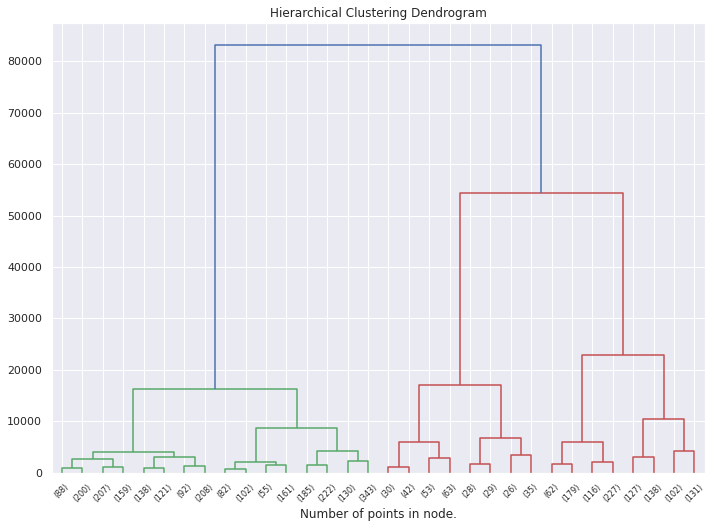

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node.")
plt.show()